In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the datasetS
data = pd.read_csv('data.csv', delimiter=';')

# Drop the irrelevant columns and set the target variable
features = data.drop(['Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)'], axis=1)
target = data['Curricular units 2nd sem (grade)']

# Identify categorical and numerical columns
categorical_features = features.select_dtypes(include=['object']).columns.tolist()
numerical_features = features.select_dtypes(exclude=['object']).columns.tolist()

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary of regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'Neural Network': MLPRegressor(max_iter=1000)
}



In [ ]:
import numpy as np

# Function to evaluate regression models
def evaluate_regression_models(models, X_train, X_test, y_train, y_test):
    model_performance = {}
    for name, model in models.items():
        # Create a pipeline
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])
        # Fit the model
        pipeline.fit(X_train, y_train)
        # Make predictions
        y_pred = pipeline.predict(X_test)
        # Calculate metrics
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        # Store results
        model_performance[name] = {'RMSE': rmse, 'R^2': r2}
        print(f"{name} - RMSE: {rmse:.4f}, R^2: {r2:.4f}")
    return model_performance

# Evaluate the models
model_performance = evaluate_regression_models(regression_models, X_train, X_test, y_train, y_test)


Linear Regression - RMSE: 2.6871, R^2: 0.7333
Ridge - RMSE: 2.6869, R^2: 0.7334
Lasso - RMSE: 3.5475, R^2: 0.5352
ElasticNet - RMSE: 3.4809, R^2: 0.5525
SVR - RMSE: 2.6598, R^2: 0.7387
Decision Tree - RMSE: 1.4676, R^2: 0.9204
Random Forest - RMSE: 1.0357, R^2: 0.9604
Gradient Boosting - RMSE: 1.0141, R^2: 0.9620
AdaBoost - RMSE: 1.1422, R^2: 0.9518
KNN - RMSE: 3.1428, R^2: 0.6352
XGBoost - RMSE: 1.0634, R^2: 0.9582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 3539, number of used features: 37
[LightGBM] [Info] Start training from score 10.227644
LightGBM - RMSE: 1.0068, R^2: 0.9626
Neural Network - RMSE: 1.3162, R^2: 0.9360


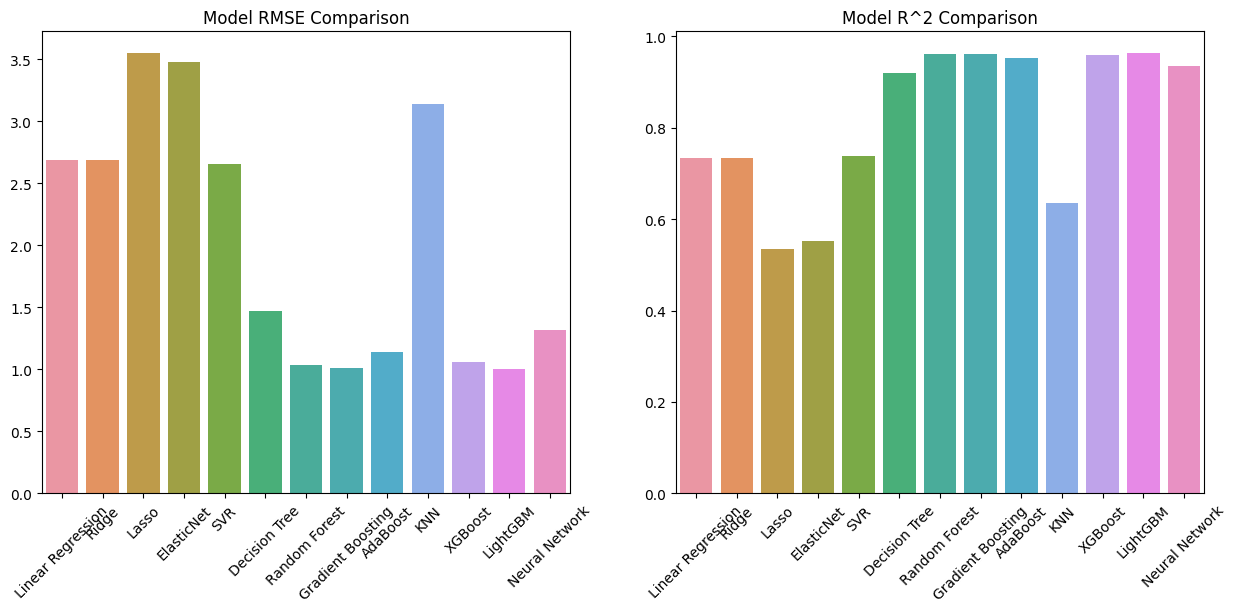

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract RMSE and R^2 values for plotting
rmse_values = [model_performance[model]['RMSE'] for model in model_performance]
r2_values = [model_performance[model]['R^2'] for model in model_performance]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# RMSE Comparison
sns.barplot(x=list(model_performance.keys()), y=rmse_values, ax=ax[0])
ax[0].set_title('Model RMSE Comparison')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

# R^2 Comparison
sns.barplot(x=list(model_performance.keys()), y=r2_values, ax=ax[1])
ax[1].set_title('Model R^2 Comparison')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

plt.show()
